In [1]:
import networkx as nx
import math
import sys
from matplotlib import pyplot as plt
from networkx import *
import statistics 

**Part 1 Question 1**

In [2]:
def initialize(G):
    fairness = {}
    goodness = {}
    reliability = dict()
    nodes = G.nodes()
    edges = G.edges()
    for node in nodes:
        fairness[node] = 1
        try:
            goodness[node] = G.in_degree(node, weight='weight')*1.0/G.in_degree(node)
        except:
            goodness[node] = 0
    for edge in edges:
        reliability[(edge[0],edge[1])] = 1 - G[edge[0]][edge[1]]['weight']
    return fairness, goodness, reliability



In [9]:

def compute_fairness_goodness(G):
    fairness, goodness,reliability = initialize(G)
    
    nodes = G.nodes()
    edges = G.edges()
    iter = 0
    while iter < 100:
        df = 0
        dg = 0
        dr = 0
        print('-----------------')
        print("Iteration number", iter)
        ################################################################################
        print('Updating goodness')
        for node in nodes:
            inedges = G.in_edges(node, data='weight')
            g = 0
            for edge in inedges:
                g += fairness[edge[0]]*edge[2]['weight']

            try:
                dg += abs(g/len(inedges) - goodness[node])
                goodness[node] = g/len(inedges)
            except:
                pass
        #################################################################################
        print('Updating fairness')
        for node in nodes:
            outedges = G.out_edges(node, data='weight')
            f = 0
            for edge in outedges:
                f += 1.0 - abs(edge[2] - goodness[edge[1]])/2.0
            try:
                df += abs(f/len(outedges) - fairness[node])
                fairness[node] = f/len(outedges)
            except:
                pass
        ##################################################################################   
        print("Updating reliability")
        for edge in edges:
            rating_distance = 1 - (abs(G[edge[0]][edge[1]]['weight'] - goodness[edge[1]])/2.0)

            user_fairness = fairness[edge[0]]
            x = (1*rating_distance + 1*user_fairness)/(2)

            if x < 0.00:
                x = 0.0
            if x > 1.0:
                x = 1.0

            dr += abs(fairness[edge[0]] - x)
            reliability[(edge[0],edge[1])] = x
        #################################################################################
        print('Differences in fairness score and goodness  and reliability score = %.2f, %.2f,%.2f' % (df, dg,dr))
        if df < math.pow(10, -6) and dg < math.pow(10, -6) and dr < 0.01:
            break
        iter+=1
    
    return fairness, goodness,reliability





In [10]:
G = nx.DiGraph()

f = open("soc-sign-bitcoinalpha.csv","r")
for l in f:
    ls = l.strip().split(",")
    G.add_edge(ls[0], ls[1], weight = float(ls[2])/10) ## the weight should already be in the range of -1 to 1
f.close()

# these two dictionaries have the required scores
fairness, goodness,reliability = compute_fairness_goodness(G)

-----------------
Iteration number 0
Updating goodness
Updating fairness
Updating reliability
Differences in fairness score and goodness  and reliability score = 222.79, 0.00,608.03
-----------------
Iteration number 1
Updating goodness
Updating fairness
Updating reliability
Differences in fairness score and goodness  and reliability score = 19.26, 52.77,602.45
-----------------
Iteration number 2
Updating goodness
Updating fairness
Updating reliability
Differences in fairness score and goodness  and reliability score = 0.90, 2.73,601.88
-----------------
Iteration number 3
Updating goodness
Updating fairness
Updating reliability
Differences in fairness score and goodness  and reliability score = 0.12, 0.31,601.81
-----------------
Iteration number 4
Updating goodness
Updating fairness
Updating reliability
Differences in fairness score and goodness  and reliability score = 0.02, 0.05,601.80
-----------------
Iteration number 5
Updating goodness
Updating fairness
Updating reliability
Di

Updating reliability
Differences in fairness score and goodness  and reliability score = 0.00, 0.00,601.80
-----------------
Iteration number 47
Updating goodness
Updating fairness
Updating reliability
Differences in fairness score and goodness  and reliability score = 0.00, 0.00,601.80
-----------------
Iteration number 48
Updating goodness
Updating fairness
Updating reliability
Differences in fairness score and goodness  and reliability score = 0.00, 0.00,601.80
-----------------
Iteration number 49
Updating goodness
Updating fairness
Updating reliability
Differences in fairness score and goodness  and reliability score = 0.00, 0.00,601.80
-----------------
Iteration number 50
Updating goodness
Updating fairness
Updating reliability
Differences in fairness score and goodness  and reliability score = 0.00, 0.00,601.80
-----------------
Iteration number 51
Updating goodness
Updating fairness
Updating reliability
Differences in fairness score and goodness  and reliability score = 0.00, 

Updating reliability
Differences in fairness score and goodness  and reliability score = 0.00, 0.00,601.80
-----------------
Iteration number 96
Updating goodness
Updating fairness
Updating reliability
Differences in fairness score and goodness  and reliability score = 0.00, 0.00,601.80
-----------------
Iteration number 97
Updating goodness
Updating fairness
Updating reliability
Differences in fairness score and goodness  and reliability score = 0.00, 0.00,601.80
-----------------
Iteration number 98
Updating goodness
Updating fairness
Updating reliability
Differences in fairness score and goodness  and reliability score = 0.00, 0.00,601.80
-----------------
Iteration number 99
Updating goodness
Updating fairness
Updating reliability
Differences in fairness score and goodness  and reliability score = 0.00, 0.00,601.80


In [11]:
sorted_fairness = sorted(fairness.items(), key=lambda kv: kv[1])
sorted_goodnesss= sorted(goodness.items(), key=lambda kv: kv[1])
sorted_reliability = sorted(reliability.items(), key=lambda kv: kv[1])

In [12]:
sorted_fairness[:10]

[('7602', 0.35135923921234313),
 ('7455', 0.36198920160962356),
 ('7601', 0.3641184030447349),
 ('2408', 0.4055943360477757),
 ('7599', 0.40945971720668406),
 ('7598', 0.409836968959087),
 ('811', 0.4110762613141232),
 ('7594', 0.4133251962891918),
 ('7476', 0.4609190120597899),
 ('7544', 0.46139754544255535)]

In [13]:
sorted_goodnesss[:10]

[('7465', -1.0),
 ('7450', -0.9987541136028557),
 ('7452', -0.9953889068207648),
 ('7453', -0.9811991110646165),
 ('7467', -0.9713701516879398),
 ('7541', -0.9673756843532368),
 ('7481', -0.966758404404912),
 ('7458', -0.9618865822715726),
 ('7476', -0.9614955324318731),
 ('7473', -0.9543592201539816)]

In [14]:
sorted_reliability[:10]

[(('7602', '7604'), 0.22087478618772027),
 (('7601', '7604'), 0.22725436810391617),
 (('7602', '7601'), 0.24151908037462227),
 (('7598', '7604'), 0.2501136510610922),
 (('7602', '7598'), 0.2689464752020955),
 (('7602', '7599'), 0.26895143904094293),
 (('7601', '7598'), 0.2753260571182914),
 (('7601', '7599'), 0.2753310209571388),
 (('7604', '7602'), 0.277009210801232),
 (('7599', '7598'), 0.297996714199266)]

**Plotting Fairness scores for bottom 50 users**

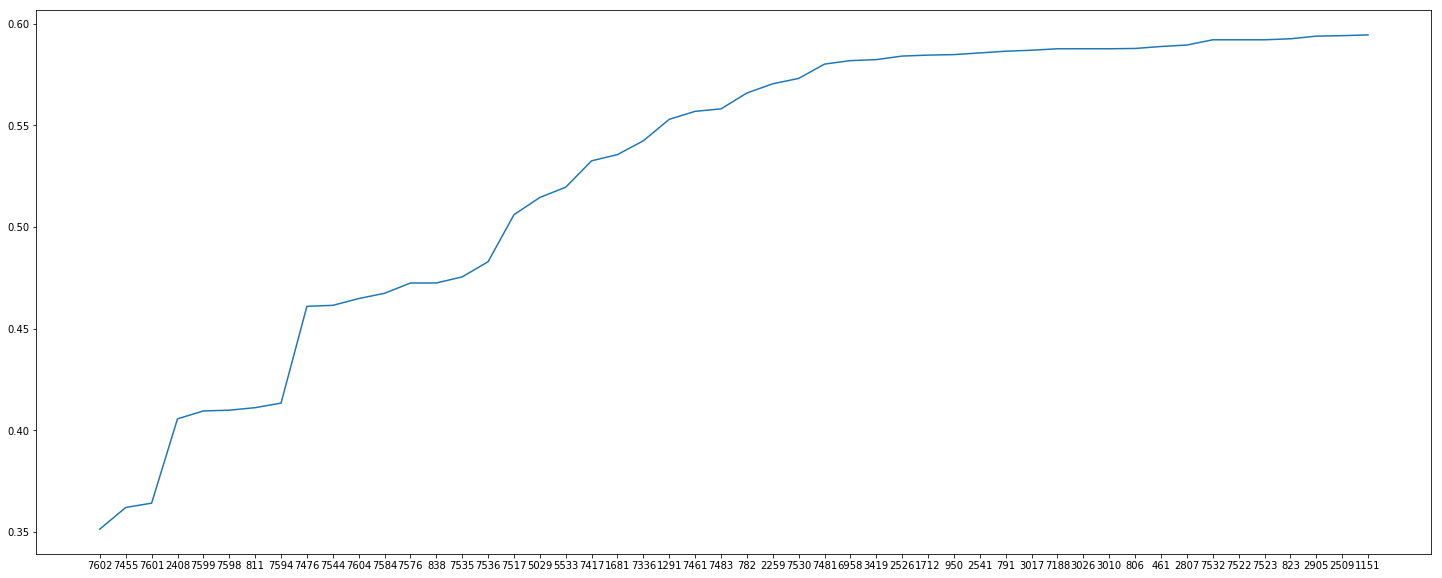

In [15]:
keys = [x[0] for x in sorted_fairness[:50]]
values = [x[1] for x in sorted_fairness[:50]]

plt.figure(figsize=(25,10))
plt.plot(keys,values)
plt.show()


**Plotting Goodness scores for bottom 50 users**

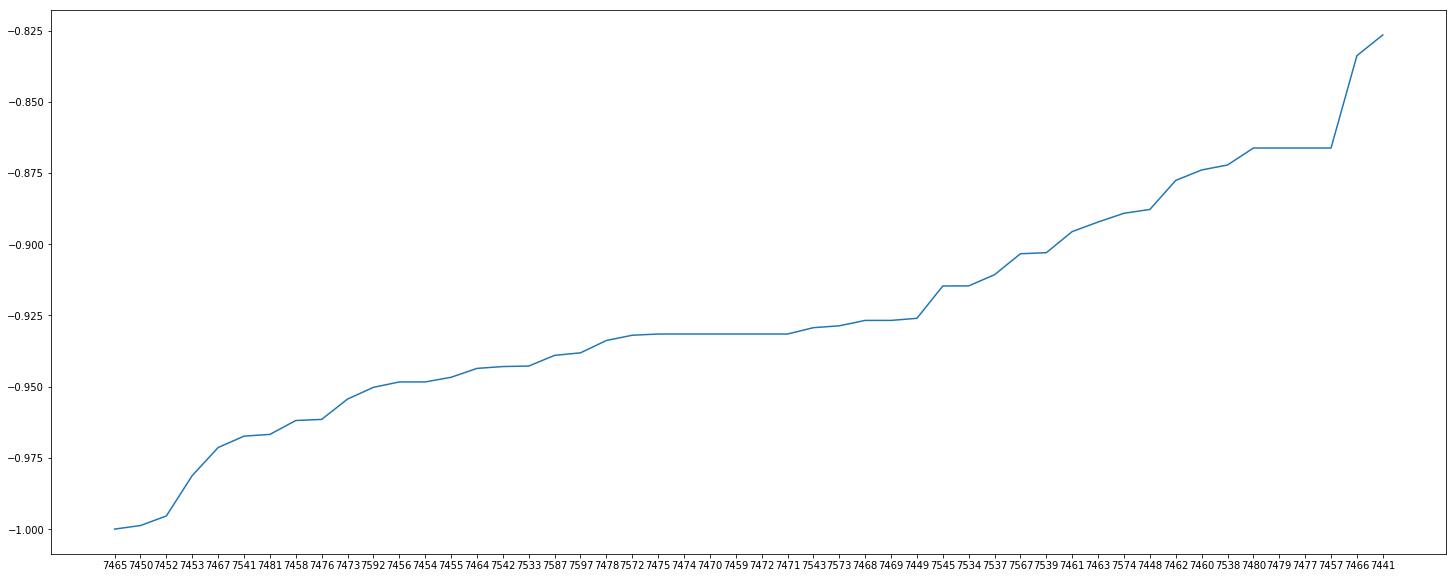

In [16]:
keys = [x[0] for x in sorted_goodnesss[:50]]
values = [x[1] for x in sorted_goodnesss[:50]]

plt.figure(figsize=(25,10))
plt.plot(keys,values)
plt.show()

**Plotting Reliability scores for each product**

In [17]:
scores = dict()
for x in sorted_reliability:
    if x[0][0] not in scores.keys():
        scores[x[0][0]] = []
        scores[x[0][0]].append(x[1])
    else:
        scores[x[0][0]].append(x[1])

printing the reliability scores for one product


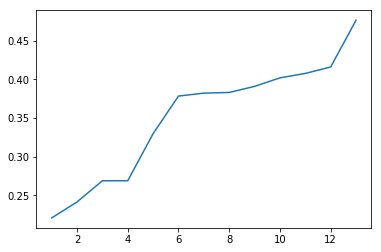

In [18]:
print("printing the reliability scores for one product")
plt.plot([x for x in range(1,len(scores['7602'])+1)],scores['7602'])
plt.show()

**Part 1 Question 2**

**To calculate the interpolated scores, I have used the fairness and goodness scores of the users,added them and normalized them using their means**

In [19]:
interPolatedScores = dict()
gMean = statistics.mean([x[1] for x in sorted_goodnesss])
fMean = statistics.mean([x[1] for x in sorted_fairness])
values = dict()
for node in sorted_fairness:
    values[node[0]] = node[1]
for node in sorted_goodnesss:
    try : 
        interPolatedScores[node[0]] = (node[1] + values[node[0]] + statistics.mean(scores[node[0]]))/(gMean + fMean + sum(scores[node[0]]))
    except:
        interPolatedScores[node[0]] = (node[1] + values[node[0]])/(gMean + fMean)


In [20]:
[(x,interPolatedScores[x]) for x in interPolatedScores][:10]

[('7465', 0.0),
 ('7450', 0.001174598689150777),
 ('7452', 0.3243167775231556),
 ('7453', 0.017725130918026365),
 ('7467', 0.026991692320432966),
 ('7541', 0.3318656227975969),
 ('7481', 0.11784530530222358),
 ('7458', 0.03593262644610285),
 ('7476', -0.026062857706541286),
 ('7473', 0.04302928445308623)]

**Part 1 Question 3**<br>
**Set of 10 Highly Trusted and 10 Highly Non-Trusted Users**

In [21]:
sorted_scores = sorted(interPolatedScores.items(), key=lambda kv: kv[1])


In [22]:
print("Top 10 Highly Non-Trusted Users")
sorted_scores[:10]

Top 10 Highly Non-Trusted Users


[('7455', -0.15656163683587085),
 ('7476', -0.026062857706541286),
 ('7602', -0.021089056741258116),
 ('7601', -0.0016591712466275498),
 ('7465', 0.0),
 ('7450', 0.001174598689150777),
 ('1', 0.004435822040231405),
 ('8', 0.008657627227413879),
 ('3', 0.009159067375186498),
 ('177', 0.010050060646646937)]

In [23]:
print("Top 10 Highly Trusted Users")
sorted_scores[-10:]

Top 10 Highly Trusted Users


[('836', 1.7581676876789827),
 ('873', 1.7640855949306191),
 ('414', 1.7727806064123504),
 ('805', 1.81201895443357),
 ('794', 1.8133312076640733),
 ('837', 1.8366021815245082),
 ('835', 1.8366021815245082),
 ('797', 1.8633262274216527),
 ('820', 1.8642680984899875),
 ('795', 1.8796653343531278)]

**Part 1 Question 4**

In [24]:
Gc = max(nx.strongly_connected_component_subgraphs(G), key=len)

**Largest Strongly Connected Component**

/home/saurabh/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:124: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/saurabh/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:520: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/saurabh/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:541: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/saurabh/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:136: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elemen

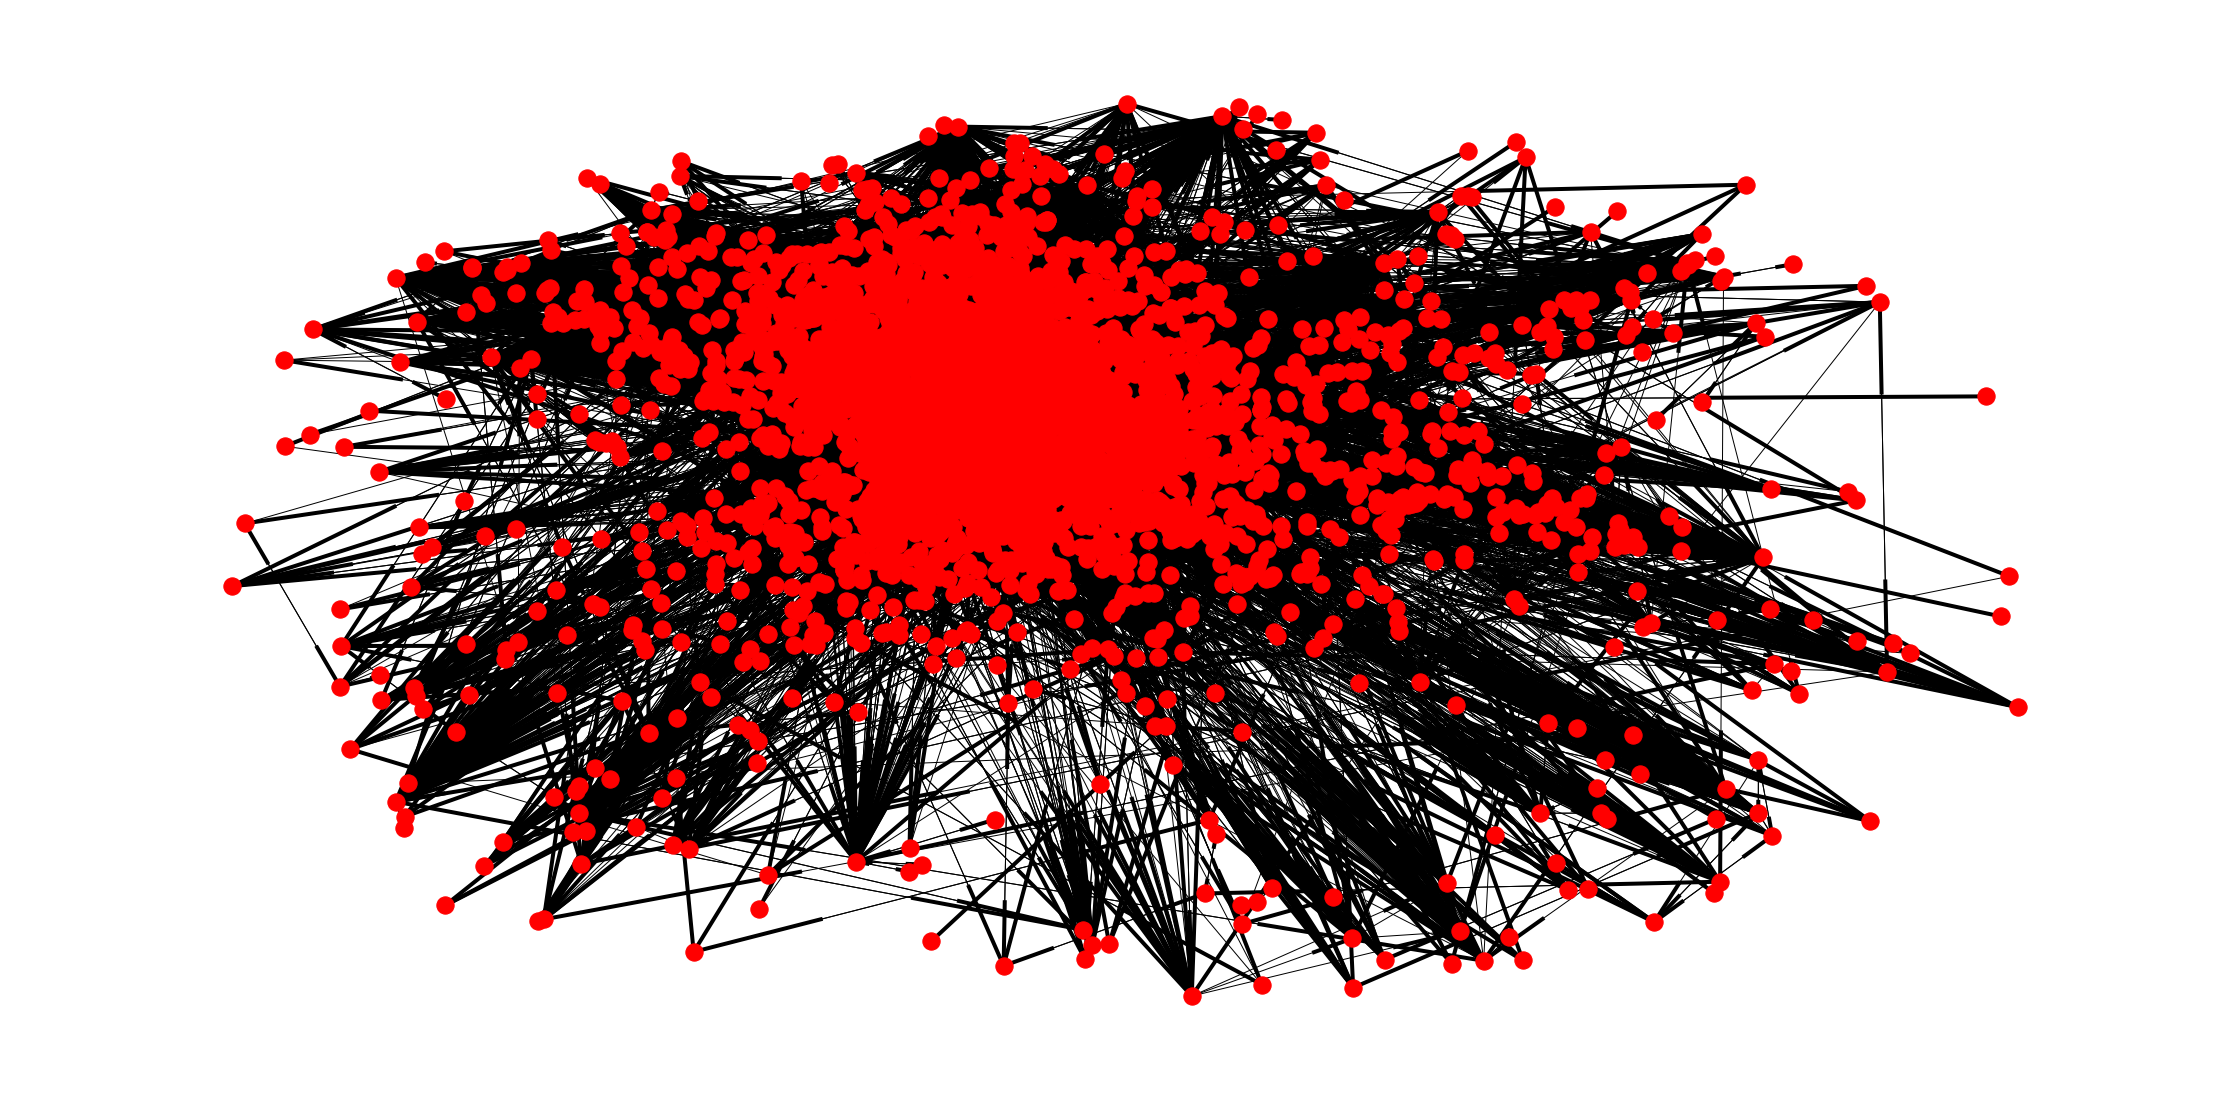

In [31]:
%matplotlib inline  
plt.figure(figsize=(30,15)) 

nx.draw(Gc)
plt.show()

In [53]:
scc = strongly_connected_components(G)
print("Size of the strongly connected component")
max([len(graphs) for graphs in scc])

Size of the strongly connected component


3235